<a href="https://colab.research.google.com/github/Vakhranev/MGIMO/blob/main/21%20%D1%84%D0%B5%D0%B2%D1%80%D0%B0%D0%BB%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Исследование взаимосвязей между переменными

**Проверка статистических гипотез**

Выполняя z-тест, t-тест и т.д., мы соответственно используем z-статистику, t-статистику и т.д. в *правиле* отклонения гипотезы. Это хорошо резюмируется следующей ниже таблицей:

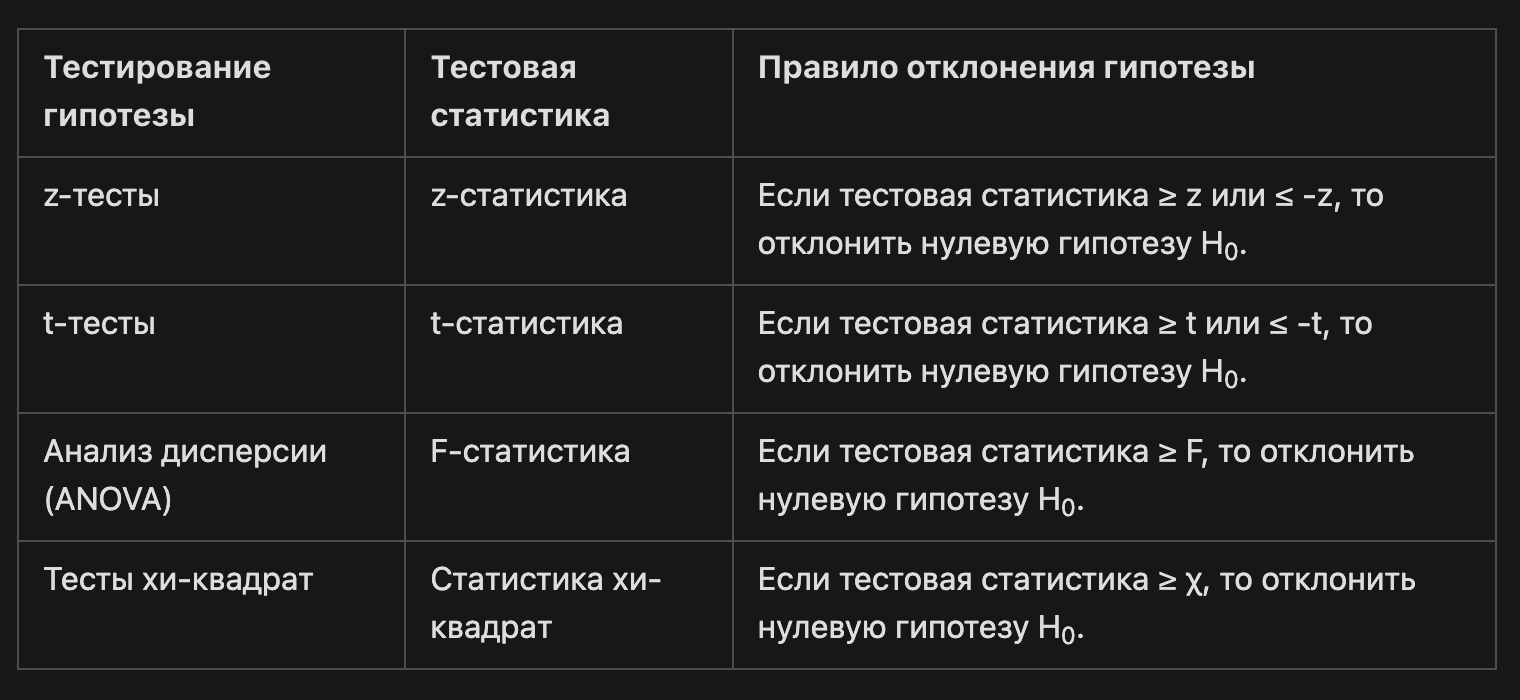

Мнение о том, что данные не покажут ничего необычного, называется *нулевой гипотезой* и обычно обозначается как *H*0.

Затем исследователь формулирует альтернативную гипотезу, обозначаемую как *H*1.

Мы хотели бы проверить, не увеличивает ли обновленный дизайн веб-сайта время пребывания, и поэтому нашей нулевой и альтернативной гипотезами будут следующие:

* *H*0: Время пребывания для обновленного веб-сайта не отличается от времени пребывания для существующего веб-сайта

* *H*1: Время пребывания для обновленного веб-сайта больше по сравнению с временем пребывания для существующего веб-сайта

Существует два риска:

* Мы можем принять расхождение как значимое, когда на самом деле оно возникло случайным образом

* Мы можем приписать расхождение случайности, когда на самом деле оно показывает истинное расхождение с популяцией

Эти две возможности обозначаются соответственно, как ошибки 1-го и 2-го рода:

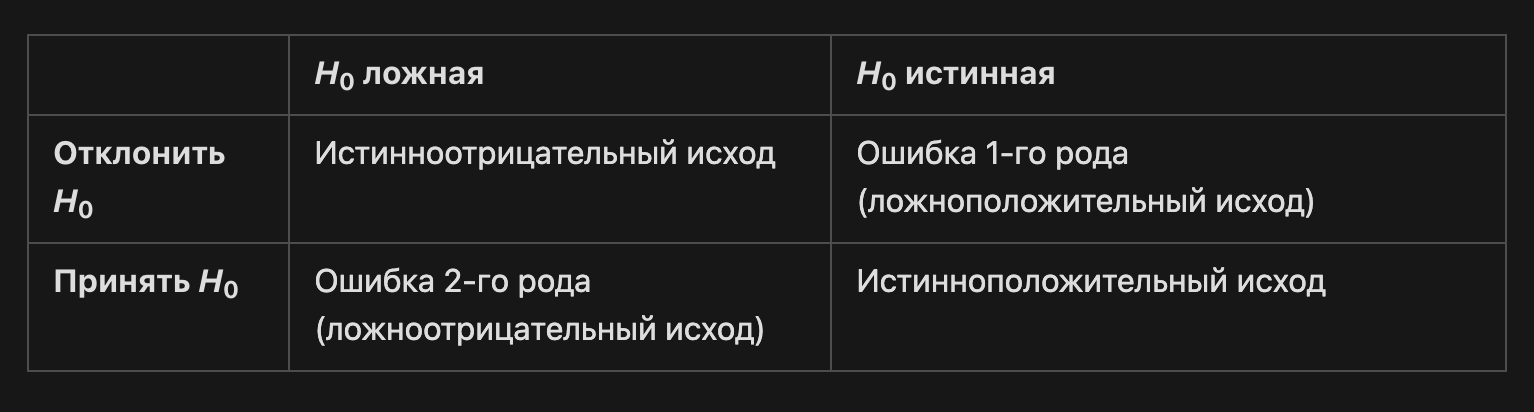

Расхождение в 5% обычно называют *значимым*, а расхождение в 1% — *крайне значимым*. В формулах этот порог часто обозначается греческой буквой α (альфа) и называется *уровнем значимости*.

При тестировании нулевой гипотезы с помощью *z*-теста мы имеем возможность сравнивать две выборки.

*Z*-тест выполняется относительно объединенной стандартной ошибки, т.е. квадратного корня суммы дисперсий (вариансов), деленных на размеры выборок. Она будет такой же, что и результат, который мы получим, если взять стандартную ошибку обеих выборок вместе:

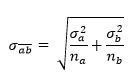

Здесь *σ*2*a* — это дисперсия выборки *a*, *σ*2*b* — дисперсия выборки *b* и соответственно *na* и *nb* — размеры выборок *a* и *b*. На Python объединенная стандартная ошибка вычисляется следующим образом:

In [1]:
def pooled_standard_error(a, b, unbias=False):
    '''Объединенная стандартная ошибка'''
    std1 = a.std(ddof=0) if unbias==False else a.std()
    std2 = b.std(ddof=0) if unbias==False else b.std()
    x = std1 ** 2 / a.count()
    y = std2 ** 2 / b.count()
    return np.sqrt(x + y)

Наблюдавшиеся расхождения между средними значениями на объединенной стандартной ошибке принято обозначать *переменной* z:

In [2]:
def z_stat(a, b, unbias=False):
    return (a.mean() - b.mean()) / pooled_standard_error(a, b, unbias)

Соотношение *z* объясняет, насколько средние значения отличаются относительно величины, которую мы ожидаем при заданной стандартной ошибке. Следовательно, *z*-статистика сообщает нам о том, на какое количество стандартных ошибок расходятся средние значения. Поскольку стандартная ошибка имеет нормальное распределение вероятностей, мы можем связать это расхождение с вероятностью, отыскав *z*-статистику в нормальной ИФР:

In [3]:
def z_test(a, b):
    return stats.norm.cdf([ z_stat(a, b) ])

В следующем ниже примере *z*-тест используется для сравнения результативность двух веб-сайтов.

Мы вызываем `groupby('site')['dwell-time']` для конвертирования набора строк в набор значений времени пребывания. Затем вызываем функцию `get_group` с номером группы, соответствующей номеру веб-сайта:


In [4]:
import numpy as np
import pandas as pd
from scipy import stats

In [5]:
def load_data(fname):
    '''Загрузка данных из файла fname'''
    return pd.read_csv(fname, sep='\t')

In [6]:
def ex_2_14():
    '''Сравнение результативности двух вариантов
       дизайна веб-сайта на основе z-теста'''
    groups = load_data('new-site.tsv').groupby('site')['dwell-time']
    a = groups.get_group(0)
    b = groups.get_group(1)

    print('a n:         ', a.count())
    print('b n:         ', b.count())
    print('z-статистика:', z_stat(a, b))
    print('p-значение:  ', z_test(a, b))

In [8]:
ex_2_14()

a n:          284
b n:          16
z-статистика: -1.6467438180091214
p-значение:   [0.04980536]


Приведем еще раз нулевую и альтернативную гипотезы:

* *H*0: Время пребывания на обновленном веб-сайте не отличается от времени пребывания на существующем веб-сайте

* *H*1: Время пребывания на обновленном веб-сайте превышает время пребывания на существующем веб-сайте.

Популяризатором *t*-распределения был химик, работавший на пивоварню Гиннес в Ирландии, Уилльям Госсетт, который включил его в свой анализ темного пива Стаут.

В то время как нормальное распределение полностью описывается двумя параметрами — средним значением и стандартным отклонением, *t*-распределение описывается лишь одним параметром, так называемыми *степенями свободы*. Чем больше степеней свободы, тем больше *t*-распределение похоже на нормальное распределение с нулевым средним и стандартным отклонением, равным 1. По мере уменьшения степеней свободы, это распределение становится более широким с более толстыми чем у нормального распределения, хвостами.

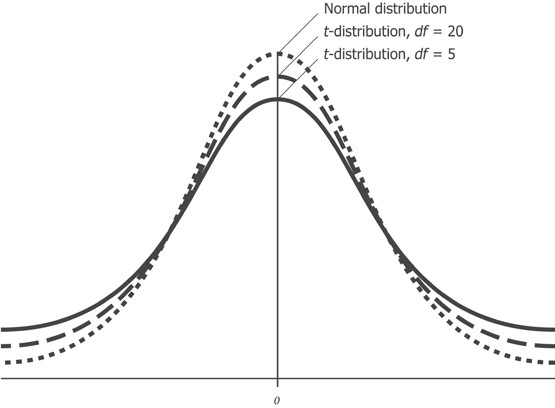

Приведенный выше рисунок показывает, как *t*-распределение изменяется относительно нормального распределения при наличии разных степеней свободы.

При использовании *t*-распределения мы обращаемся к *t*-статистике. Как и *z*-статистика, эта величина количественно выражает степень маловероятности отдельно взятого наблюдавшегося отклонения. Для двухвыборочного *t*-теста соответствующая *t*-статистика вычисляется следующим образом:

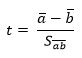

Здесь *Sa̅b̅* — это объединенная стандартная ошибка. Объединенная стандартная ошибка вычисляется таким же образом, как и раньше:

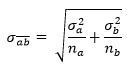

Однако это уравнение допускает наличие информации о популяционных параметрах *σa* и *σb*, которые можно аппроксимировать только на основе крупных выборок. *t*-тест предназначен для малых выборок и не требует от нас принимать допущения о поплуляционной дисперсии (вариансе).

Как следствие, объединенная стандартная ошибка для *t*-теста записывается как квадратный корень суммы стандартных ошибок:

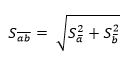

Разница в математической записи всего лишь служит для иллюстрации того, что в условиях *t*-теста мы на входе зависим только от выборочных статистик. Объединенная стандартная ошибка  может быть вычислена следующим образом:

In [9]:
def variance(xs):
    '''Вычисление дисперсии,
       несмещенная дисперсия при n <= 30'''
    x_hat = xs.mean()
    n = len(xs)
    n = n-1 if n in range(1, 30) else n
    square_deviation = lambda x : (x - x_hat) ** 2
    return sum( map(square_deviation, xs) ) / n

def standard_deviation(xs):
    '''Вычисление стандартного отклонения'''
    return np.sqrt(variance(xs))

def standard_error(xs):
    '''Вычисление стандартной ошибки'''
    return standard_deviation(xs) / np.sqrt(len(xs))

In [10]:
def pooled_standard_error_t(a, b):
    '''Объединенная стандартная ошибка для t-теста'''
    return np.sqrt(standard_error(a) ** 2 +
                   standard_error(b) ** 2)

Хотя в математическом плане *t*-статистика и *z*-статистика представлены по-разному, на практике процедура вычисления обоих идентичная:

In [11]:
t_stat = z_stat

def ex_2_15():
    '''Вычисление t-статистики
       двух вариантов дизайна веб-сайта'''
    groups = load_data('new-site.tsv').groupby('site')['dwell-time']
    a = groups.get_group(0)
    b = groups.get_group(1)
    return t_stat(a, b)

In [12]:
ex_2_15()

-1.6467438180091214

Различие между двумя выборочными показателями является не алгоритмическим, а концептуальным — *z*-статистика применима только тогда, когда выборки подчинены нормальному распределению.

Разница в характере работы *t*-теста вытекает из распределения вероятностей, из которого вычисляется наше *p*-значение. Вычислив *t*-статистику, мы должны отыскать ее значение в *t*-распределении, параметризованном степенями свободы наших данных:

In [13]:
def t_test(a, b):
    df = len(a) + len(b) - 2
    return stats.t.sf([ abs(t_stat(a, b)) ], df)

Значение степени свободы обеих выборок на две единицы меньше их размеров, и для наших выборок составляет 298.

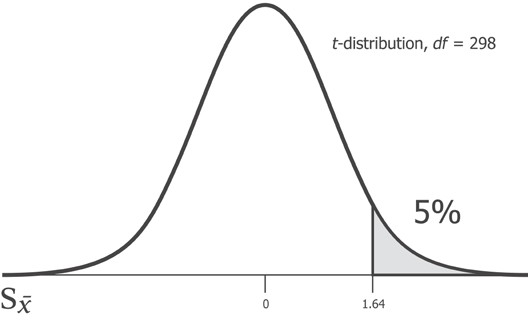

Так как мы выполняем проверку статистической гипотезы. Поэтому выдвинем нашу нулевую и альтернативную гипотезы:

* *H*0: Эта выборка взята из популяции с предоставленным средним значением

* *H*1: Эта выборка взята из популяции со средним значением большего размера

Выполним следующий ниже пример:

In [14]:
def ex_2_16():
    '''Сравнение результативности двух вариантов
       дизайна веб-сайта на основе t-теста'''
    groups = load_data('new-site.tsv').groupby('site')['dwell-time']
    a = groups.get_group(0)
    b = groups.get_group(1)
    return t_test(a, b)

In [15]:
ex_2_16()

array([0.05033241])

Этот пример вернет *p*-значение, составляющее более 0.05. Поскольку оно больше *α*, равного 5%, который мы установили для проверки нулевой гипотезы, то мы не можем ее отклонить. Наша проверка с использованием *t*-теста значимого расхождения между средними значениями не обнаружила. Следовательно, наш едва значимый результат *z*-теста отчасти объясняется наличием слишком малой выборки.

Проверки, при выполнении которых мы ищем только значимое количественное увеличение или уменьшение, называются *односторонними* и обычно не приветствуются, кроме случая, когда изменение в противоположном направлении было бы невозможным. Название термина «односторонний» обусловлено тем, что односторонняя проверка размещает всю *α* в одном хвосте распределения.

Подход с допущением возможности того, что обновленный веб-сайт может в действительности оказаться хуже существующег, распределяет нашу *α* одинаково по обоим хвостам распределения и обеспечивает значимый результат, не искаженный под воздействием априорного допущения об улучшении работы обновленного веб-сайта.

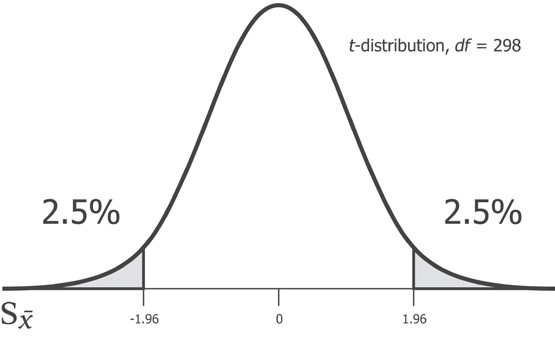

В действительности в модуле stats библиотеки scipy уже предусмотрены функции для выполнения двухвыборочных *t*-проверок. Это функция `stats.ttest_ind`.

Если именованный аргумент `equal_var` равен `True`, то выполняется стандартная независимая проверка двух выборок, которая предполагает равные популяционные дисперсии, в противном случае выполняется проверка Уэлша (обратите внимание на служебную функцию `t_test_verbose`):

In [20]:
def t_test_verbose(a, sample2=None, mean=None, fn=None):
    '''Служебная функция с подробной информацией
       результата t-теста Уэлша'''
    abar = a.mean()
    avar = a.var(ddof=1)  # несмещенное значение
    na = a.size
    adof = na - 1
    conf_int = stats.t.interval(0.95, len(a)-1,
                                loc=np.mean(a), scale=stats.sem(a))

    if type(a) == type(sample2):
        bbar = sample2.mean()
        bvar = sample2.var(ddof=1)
        nb = sample2.size
        bdof = nb - 1

        dof = (avar/na + bvar/nb)**2 /   \
              (avar**2/(na**2*adof) + bvar**2/(nb**2*bdof))
        return {'p-значение'           :
                   fn(a, sample2, equal_var=False).pvalue,  #  выполняет t-тест Уэлша
                'степени свободы     ' : dof,  #t_test(a, b),
                'интервал уверенности' : conf_int,
                'n1          ' : a.count(),
                'n2          ' : sample2.count(),
                'среднее x   ' : a.mean(),
                'среднее y   ' : sample2.mean(),
                'дисперсия x ' : a.var(),
                'дисперсия y ' : sample2.var(),
                't-статистика' : fn( a, sample2, equal_var=False ).statistic}
    else:
        dof = (avar/na) / (avar/(na*adof))
        return {'p-значение          ' : fn(a, mean).pvalue,
                'степени свободы df  ' : dof,
                'интервал уверенности' : conf_int,
                'n1                  ' : a.count(),
                'среднее x           ' : a.mean(),
                'дисперсия x         ' : a.var(),
                't-статистика        ' : fn(a, mean).statistic}

In [16]:
def ex_2_17():
    '''Двухсторонний t-тест'''
    groups = load_data('new-site.tsv').groupby('site')['dwell-time']
    a = groups.get_group(0)
    b = groups.get_group(1)
    return t_test_verbose(a, sample2=b, fn=stats.ttest_ind) #t-тест Уэлша

In [21]:
ex_2_17()

{'p-значение': 0.12756432502462475,
 'степени свободы     ': 17.761382349686098,
 'интервал уверенности': (76.00263198799597, 99.89877646270826),
 'n1          ': 284,
 'n2          ': 16,
 'среднее x   ': 87.95070422535211,
 'среднее y   ': 122.0,
 'дисперсия x ': 10463.941024237296,
 'дисперсия y ': 6669.866666666667,
 't-статистика': -1.5985205593851322}

По результатам *t*-теста служебная функция `t_test_verbose` возвращает много информации и в том числе *p*-значение. *P*-значение примерно в 2 раза больше того, которое мы вычислили для односторонней проверки. На деле, единственная причина, почему оно не совсем в два раза больше, состоит в том, что в модуле stats имплементирован легкий вариант *t*-теста, именуемый *t*-тестом *Уэлша*, который немного более робастен, когда две выборки имеют разные стандартные отклонения.

Независимые выборки в рамках *t*-тестов являются наиболее распространенным видом статистического анализа, который обеспечивает очень гибкий и обобщенный способ установления, что две выборки представляют одинаковую либо разную популяцию. Однако в случаях, когда популяционное среднее уже известно, существует еще более простая проверка, представленная функцией библиотеки `sciзy stats.ttest_1samp`.

Так, если мы просто хотим узнать, не отличается ли обновленный веб-сайт значимо от существующего популяционного среднего времени пребывания, равного 90 сек., то подобную проверку можно выполнить следующим образом:

In [22]:
def ex_2_18():
    groups = load_data('new-site.tsv').groupby('site')['dwell-time']
    b = groups.get_group(1)
    return t_test_verbose(b, mean=90, fn=stats.ttest_1samp)

In [23]:
ex_2_18()

{'p-значение          ': 0.13789520958229415,
 'степени свободы df  ': 15.0,
 'интервал уверенности': (78.4815276659039, 165.5184723340961),
 'n1                  ': 16,
 'среднее x           ': 122.0,
 'дисперсия x         ': 6669.866666666667,
 't-статистика        ': 1.5672973291495713}

Служебная функция `t_test_verbose` не только возвращает *p*-значение для выполненной проверки, но и интервал уверенности для популяционного среднего.

В целях развития интуитивного понимания относительно того, каким образом *t*-тест способен подтвердить и вычислить эти статистики из столь малых данных, мы можем применить подход, который связан с *многократными выборками*, от англ. resampling.

Функция sample принимает ряд опциональных аргументов, в т.ч. `n` (число элементов, которые нужно вернуть из числового ряда), `axis` (ось, из которой извлекать выборку) и `replace` (выборка с возвратом или без), по умолчанию равный `False`. После этой функции можно задать метод агрегирования, вычисляющий сводную статистику в отношении бутстраповских выборок:

In [30]:
import matplotlib.pyplot as plt

In [24]:
def ex_2_19():
    '''Построение графика синтетических времен пребывания
       путем извлечения бутстраповских выборок'''
    groups = load_data('new-site.tsv').groupby('site')['dwell-time']
    b = groups.get_group(1)
    xs = [b.sample(len(b), replace=True).mean() for _ in range(1000)]
    pd.Series(xs).hist(bins=20)
    plt.xlabel('Бутстрапированные средние значения времени пребывания, сек.')
    plt.ylabel('Частота')
    plt.show()

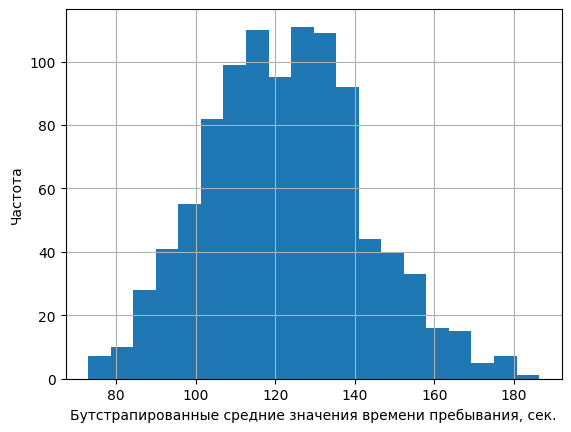

In [31]:
ex_2_19()

Хотя на входе имелась лишь одна выборка, состоящая из 16 посетителей, бутстрапированные выборки очень четко просимулировали стандартную ошибку изначальной выборки и позволили визуализировать интервал уверенности (между 78 и 165 сек.), вычисленный ранее в результате одновыборочного *t*-теста.

Pначения времени пребывания посетителей на каждом варианте веб-сайта были промаркированы числами, при этом число 0 соответствовало веб-сайту с исходным дизайном, а числа от 1 до 19 представляли другие варианты дизайна:

In [34]:
def ex_2_20():
    df = load_data('multiple-sites.tsv')
    return df.groupby('site').aggregate(np.mean)

In [35]:
ex_2_20()

<ipython-input-34-c1847e1956b7>:3: FutureWarning: The provided callable <function mean at 0x7eb1ac3aa160> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  return df.groupby('site').aggregate(np.mean)


,dwell-time
site,
0,79.851064
1,106.000000
2,88.229167
3,97.479167
4,94.333333
5,102.333333
6,144.192982
7,123.367347
8,94.346939


Чтобы проверить каждый вариант дизайна веб-сайта и увидеть, не генерирует ли какой-либо из них статистически значимый результат, можно сравнить варианты дизайна веб-сайта друг с другом следующим образом, причем нам потребуется вспомогательный модуль Python itertools, который содержит набор функций, создающих [итераторы](https://docs.python.org/3/library/itertools.html) для эффективной циклической обработки:

In [36]:
import itertools

def ex_2_21():
    '''Проверка вариантов дизайна веб-сайта на основе t-теста
       по принципу "каждый с каждым"'''
    groups = load_data('multiple-sites.tsv').groupby('site')
    alpha = 0.05
    pairs = [list(x)   # найти сочетания из n по k
             for x in itertools.combinations(range(len(groups)), 2)]
    for pair in pairs:
        gr, gr2 = groups.get_group( pair[0] ), groups.get_group( pair[1] )
        site_a, site_b = pair[0], pair[1]
        a, b = gr['dwell-time'], gr2['dwell-time']
        p_val = stats.ttest_ind(a, b, equal_var = False).pvalue
        if p_val < alpha:
            print('Варианты веб-сайта %i и %i значимо различаются: %f'
                  % (site_a, site_b, p_val))

С другой стороны, мы можем сравнить каждый вариант дизайна веб-сайта с нашим текущим изначальным значением — средним значением времени пребывания, равным 90 сек., измеренным на данный момент для существующего веб-сайта:

In [43]:
def ex_2_22():
    groups = load_data('multiple-sites.tsv').groupby('site')
    alpha = 0.05
    baseline = groups.get_group(0)['dwell-time']
    for site_a in range(1, len(groups)):
        a = groups.get_group( site_a )['dwell-time']
        p_val = stats.ttest_ind(a, baseline, equal_var = False).pvalue
        if p_val < alpha:
            print('Вариант %i веб-сайта значимо отличается: %f'
                  % (site_a, p_val))

In [44]:
ex_2_22()

Вариант 6 веб-сайта значимо отличается: 0.005534
Вариант 7 веб-сайта значимо отличается: 0.035068
Вариант 10 веб-сайта значимо отличается: 0.006881
Вариант 15 веб-сайта значимо отличается: 0.046591


Малые *p*-значения (меньше 1%) указывают на то, что существует статистически очень значимые расхождения.

Мы выполнили *t*-тест по 20 выборкам данных с уровнем значимости *α*, равным 0.05. Уровень значимости *α* определяется, как вероятность неправильного отказа от нулевой гипотезы. На самом деле после 20-кратного выполнения *t*-теста становится вероятным, что мы неправильно отклоним нулевую гипотезу по крайней мере для одного варианта веб-сайта из 20.

Сравнивая таким одновременным образом многочисленные страницы, мы делаем результаты *t*-теста невалидными.

Настройка очень простая — поправка Бонферрони попросту делит требуемое значение *α* на число тестов. Например, если для теста имелось *k* вариантов дизайна веб-сайта, и *α* эксперимента равно 0.05, то поправка Бонферрони выражается следующим образом:

8e92afd762f10ec07945a4dd5a4e1c52.svg

Следующий пример идентичен примеру `ex-2-22`, за исключением того, что значение *α* разделено на число групп:

In [45]:
def ex_2_23():
    '''Проверка вариантов дизайна веб-сайта на основе t-теста
       против исходного (0) с поправкой Бонферрони'''
    groups = load_data('multiple-sites.tsv').groupby('site')
    alpha = 0.05 / len(groups)
    baseline = groups.get_group(0)['dwell-time']
    for site_a in range(1, len(groups)):
        a = groups.get_group(site_a)['dwell-time']
        p_val = stats.ttest_ind(a, baseline, equal_var = False).pvalue
        if p_val < alpha:
            print('Вариант %i веб-сайта значимо отличается от исходного: %f'
                  % (site_a, p_val))

Все исходные данные взяты в [репозитории](https://github.com/clojuredatascience/ch2-inference) автора книги.